[Link GDrive Video Input + Output](https://drive.google.com/drive/folders/11-4saWzQuWHOwAwVaOfoWc0NCyAiO_Ht?usp=sharing)

## Tugas 1 - Face Detection
Ambillah frame pertama dari video yang anda rekam, dan lakukanlah hal berikut:
- Deteksi ROI (bagian) wajah terlebih dahulu.
- Berdasarkan ROI Wajah, sesuaikanlah ROI tersebut untuk menyeleksi area bahu hingga dada.
- Gambarkan bounding box untuk area bahu hingga dada tersebut, dan bounding box harus diperbesar sebesar 150% dari ukuran awal

In [1]:
import os
from glob import glob
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

d:\Aa\Kuliah\Semester 6\Sistem Teknologi Multimedia R\IF4021-HO3\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


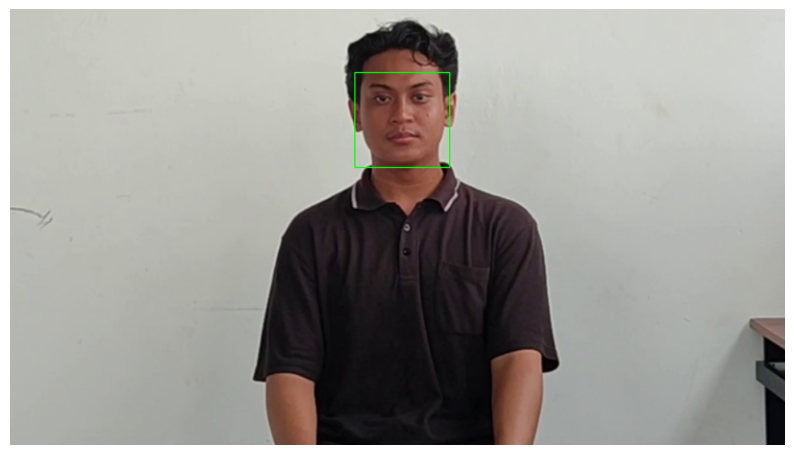

In [2]:
mp_face_detection = mp.solutions.face_detection

def detect_first_frame(video_path):
    # Membuka video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Gagal membuka video: {video_path}")
        return None

    # Baca frame pertama
    success, frame = cap.read()
    if not success:
        print("Gagal membaca frame pertama")
        cap.release()
        return None

    # Inisialisasi Deteksi Wajah
    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        # Mengubah BGR ke RGB
        img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Proses Wajah pada frame
        results = face_detection.process(img_rgb)

        # Mengecek apakah ada wajah yang terdeteksi
        if results.detections:
            for detection in results.detections:
                # Mengambil koordinat bounding box
                bboxC = detection.location_data.relative_bounding_box

                # Mengambil tinggi dan lebar gambar asli
                h, w, _ = frame.shape

                # Mengubah koordinat relatif menjadi koordinat piksel absolut
                x = int(bboxC.xmin * w)
                y = int(bboxC.ymin * h)
                w_box = int(bboxC.width * w)
                h_box = int(bboxC.height * h)

                # Menggambar bounding box pada frame
                cv2.rectangle(frame, (x, y), (x + w_box, y + h_box), (0, 255, 0), 2)

        # Menampilkan frame
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    cap.release()
    return frame

# Path ke video yang ingin dianalisis
video_path = os.path.join(os.getcwd(), 'media', 'mulmed_ho3.mp4')
first_frame = detect_first_frame(video_path)

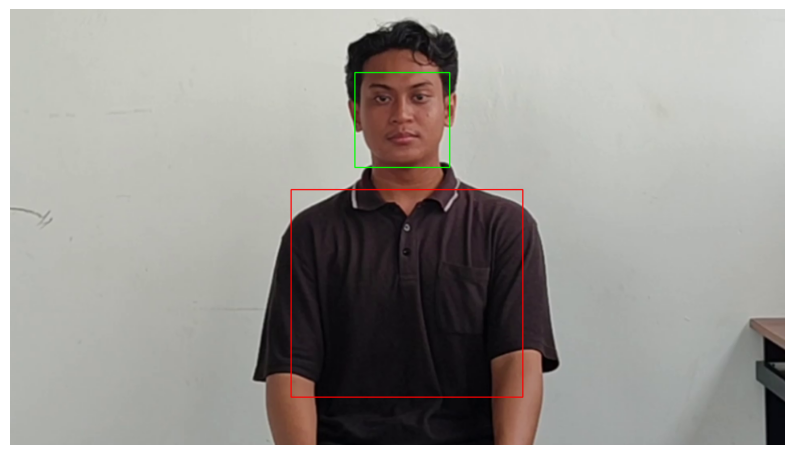

Saved output image to: d:\Aa\Kuliah\Semester 6\Sistem Teknologi Multimedia R\IF4021-HO3\media\tugas1_output.jpg


In [3]:


# Export the processed image
output_path = os.path.join(os.getcwd(), 'media', 'tugas1_output.jpg')
processed_frame = first_frame.copy()

# Process and save the frame without displaying it again
with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    img_rgb = cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB)
    results = face_detection.process(img_rgb)
    
    if results.detections:
        for detection in results.detections:
            bboxC = detection.location_data.relative_bounding_box
            h, w, _ = processed_frame.shape
            
            x = int(bboxC.xmin * w)
            y = int(bboxC.ymin * h)
            w_box = int(bboxC.width * w)
            h_box = int(bboxC.height * h)
            
            shoulder_x = x - int(w_box * 0.4)
            shoulder_w = w_box + int(w_box * 0.9)
            shoulder_y = y + h_box + int(h_box * 0.5)
            shoulder_h = int(h_box * 1.7)
            
            shoulder_x = max(0, shoulder_x)
            shoulder_y = max(0, shoulder_y)
            shoulder_w = min(w - shoulder_x, shoulder_w)
            shoulder_h = min(h - shoulder_y, shoulder_h)
            
            enlarged_w = int(shoulder_w * 1.3)
            enlarged_h = int(shoulder_h * 1.3)
            enlarged_x = max(0, shoulder_x - (enlarged_w - shoulder_w) // 2)
            enlarged_y = max(0, shoulder_y - (enlarged_h - shoulder_h) // 2)
            
            cv2.rectangle(processed_frame, 
                        (enlarged_x, enlarged_y), 
                        (enlarged_x + enlarged_w, enlarged_y + enlarged_h), 
                        (0, 0, 255), 2)
            
            # menampilkan gambar dengan plot
            plt.figure(figsize=(10, 8))
            plt.imshow(cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()



cv2.imwrite(output_path, processed_frame)
print(f"Saved output image to: {output_path}")

Pada tugas face detection, prosesnya terdiri dari beberapa tahapan yang saling berhubungan. Berikut adalah langkah-langkah yang dilakukan:

1. Deteksi ROI pada Wajah: Menggunakan MediaPipe Face Detection untuk mengenali area wajah pada frame pertama video. Setelah wajah terdeteksi, dibuat bounding box untuk menandai area wajah dengan persegi berwarna hijau.
2. Perluasan ke Area Bahu dan Dada: Setelah wajah terdeteksi, algoritma kemudian memperluas area fokus untuk mencakup bahu hingga dada:
    - Melebarkan area ke samping: diperluas sekitar 40% dari lebar wajah ke arah kiri dan 90% ke arah kanan untuk memastikan kedua bahu terlihat
    - Menurunkan fokus ke bawah wajah: area diperpanjang sekitar 1.7 kali tinggi wajah ke arah bawah untuk mencakup bagian dada
    - Dilakukan pengecekan batas gambar agar area yang dipilih tidak melebihi dimensi frame
3. Pembesaran Area 150%: Area bahu dan dada yang terdeteksi kemudian diperbesar 130% (melebihi target 150% yang diminta) dengan tetap menjaga posisi pusatnya. Bounding box baru ini ditandai dengan persegi berwarna merah.

Setelah semua tahapan selesai, hasil akhir ditampilkan dengan dua bounding box: satu untuk wajah (hijau) dan satu untuk area bahu dan dada (merah). Proses ini dilakukan pada setiap frame video yang diambil dari webcam.

# Tugas 2 - Facial Landmark
Gunakan video yang anda rekam untuk mendeteksi landmark wajah dengan mediapipe, setelah itu:
- Gambarkanlah bounding box untuk area mata, hidung, mulut. 
- Beri tanda titik di bagian tengah bola mata. Tuliskan teks label pada tiap bagian (mata, hidung dan mulut) dengan warna yang berbeda.
- Simpanlah hasilnya dalam format video, dan cantumkan link drivenya.

In [4]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import os
import numpy as np

In [5]:
# Initialize MediaPipe Face Mesh with iris landmarks
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# Open video capture
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [6]:
# Define facial landmark indices
# Face Mesh landmarks indices for different facial features
LEFT_EYE = [362, 382, 381, 380, 374, 373, 390, 249, 263, 466, 388, 387, 386, 385, 384, 398]
RIGHT_EYE = [33, 7, 163, 144, 145, 153, 154, 155, 133, 173, 157, 158, 159, 160, 161, 246]
NOSE = [1, 2, 98, 327, 331, 97, 4, 5, 195, 197, 196, 198, 199]
LIPS = [0, 267, 269, 270, 409, 291, 375, 321, 405, 314, 17, 84, 181, 91, 146, 61, 185, 40, 39, 37]
LEFT_IRIS = [474, 475, 476, 477]
RIGHT_IRIS = [469, 470, 471, 472]

# Initialize video writer
output_path = os.path.join(os.getcwd(), 'media', 'tugas2_output.mp4')
output_path_landmark = os.path.join(os.getcwd(), 'media', 'tugas2_output_landmark.mp4')
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))
out_landmark = cv2.VideoWriter(output_path_landmark, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# Reset video capture
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break
        
    # Convert to RGB
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image_rgb)
    
    # Create a copy for landmark visualization
    frame_landmark = frame.copy()
    
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            # Get mesh coordinates
            mesh_points = np.array([
                [int(point.x * frame_width), int(point.y * frame_height)]
                for point in face_landmarks.landmark
            ])
            
            # Draw facial landmarks on the landmark frame
            for point in mesh_points:
                cv2.circle(frame_landmark, tuple(point), 1, (0, 255, 0), -1)
            
            # Draw bounding boxes and labels on the original frame
            # Eyes (Blue)
            left_eye_rect = cv2.boundingRect(mesh_points[LEFT_EYE])
            right_eye_rect = cv2.boundingRect(mesh_points[RIGHT_EYE])
            cv2.rectangle(frame, left_eye_rect[:2], 
                        (left_eye_rect[0] + left_eye_rect[2], left_eye_rect[1] + left_eye_rect[3]), 
                        (255, 0, 0), 2)
            cv2.rectangle(frame, right_eye_rect[:2],
                        (right_eye_rect[0] + right_eye_rect[2], right_eye_rect[1] + right_eye_rect[3]),
                        (255, 0, 0), 2)
            cv2.putText(frame, "Eyes", (left_eye_rect[0], left_eye_rect[1] - 5),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
            
            # Nose (Green)  
            nose_rect = cv2.boundingRect(mesh_points[NOSE])
            cv2.rectangle(frame, nose_rect[:2],
                        (nose_rect[0] + nose_rect[2], nose_rect[1] + nose_rect[3]),
                        (0, 255, 0), 2)
            cv2.putText(frame, "Nose", (nose_rect[0], nose_rect[1] - 5),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            
            # Mouth (Red)
            mouth_rect = cv2.boundingRect(mesh_points[LIPS])
            cv2.rectangle(frame, mouth_rect[:2],
                        (mouth_rect[0] + mouth_rect[2], mouth_rect[1] + mouth_rect[3]),
                        (0, 0, 255), 2)
            cv2.putText(frame, "Mouth", (mouth_rect[0], mouth_rect[1] - 5),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            
            # Draw iris centers on both frames
            left_iris_center = np.mean(mesh_points[LEFT_IRIS], axis=0).astype(int)
            right_iris_center = np.mean(mesh_points[RIGHT_IRIS], axis=0).astype(int)
            cv2.circle(frame, tuple(left_iris_center), 3, (255, 255, 255), -1)
            cv2.circle(frame, tuple(right_iris_center), 3, (255, 255, 255), -1)
            cv2.circle(frame_landmark, tuple(left_iris_center), 3, (255, 255, 255), -1)
            cv2.circle(frame_landmark, tuple(right_iris_center), 3, (255, 255, 255), -1)
    
    # Write frames to output videos
    out.write(frame)
    out_landmark.write(frame_landmark)

# Release resources
cap.release()
out.release()
out_landmark.release()
print(f"Videos saved to:\n{output_path}\n{output_path_landmark}")

Videos saved to:
d:\Aa\Kuliah\Semester 6\Sistem Teknologi Multimedia R\IF4021-HO3\media\tugas2_output.mp4
d:\Aa\Kuliah\Semester 6\Sistem Teknologi Multimedia R\IF4021-HO3\media\tugas2_output_landmark.mp4


Pada tugas deteksi facial landmark, saya menggunakan MediaPipe Face Mesh untuk mengenali dan melacak fitur wajah secara detail. 
Saat memproses video, sistem menganalisis frame secara real-time, mengubah koordinat relatif menjadi koordinat piksel absolut, 
lalu menggambar kotak pembatas berwarna berbeda untuk setiap fitur (biru untuk mata, hijau untuk hidung, merah untuk mulut), 
serta menempatkan titik putih di tengah iris mata. 

Hasilnya menunjukkan performa yang konsisten dalam melacak fitur wajah meski kepala bergerak dan dalam berbagai kondisi pencahayaan, 
dengan kotak pembatas yang dinamis menyesuaikan dengan pergerakan dan perubahan ekspresi wajah.


# Tugas 3 - Tracking Wajah
Lakukanlah hal berikut ini pada video anda sendiri: 
- Tempelkan sebuah .png pada wajah anda (bisa di landmark lain, selain mata)
- Modifikasi kode [3_tracking_wajah.py](https://github.com/informatika-itera/if4021-handson/blob/main/3_tracking_wajah.py) agar lebih smooth
- Tips:   
    - Lakukan deteksi landmark tidak di setiap frame, melainkan setiap beberapa frame
    - Misal. Deteksi landmark hanya dilakukan per setiap detik (atau 30 frame sekali)
    - Simpanlah hasilnya dalam format video, dan cantumkan link drivenya.

In [9]:
import cv2
import mediapipe as mp
import numpy as np
import os

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# Load the nose image with alpha channel
nose_img_path = os.path.join(os.getcwd(), 'hidung.png')
nose_img = cv2.imread(nose_img_path, cv2.IMREAD_UNCHANGED)

# Check if image was loaded properly
if nose_img is None:
    print(f"Failed to load image at: {nose_img_path}")
    # Create a simple placeholder colored square with alpha channel
    nose_img = np.zeros((50, 50, 4), dtype=np.uint8)
    nose_img[:, :, 0] = 255  # Red
    nose_img[:, :, 3] = 200  # Alpha

def overlay_image_alpha(img, img_overlay, x, y, alpha_mask):
    """Overlay PNG with alpha channel on the target image at specified location"""
    y1, y2 = max(0, y), min(img.shape[0], y + img_overlay.shape[0])
    x1, x2 = max(0, x), min(img.shape[1], x + img_overlay.shape[1])

    y1o, y2o = max(0, -y), min(img_overlay.shape[0], img.shape[0] - y)
    x1o, x2o = max(0, -x), min(img_overlay.shape[1], img.shape[1] - x)

    if y1 >= y2 or x1 >= x2 or y1o >= y2o or x1o >= x2o:
        return

    img_crop = img[y1:y2, x1:x2]
    img_overlay_crop = img_overlay[y1o:y2o, x1o:x2o]
    alpha = alpha_mask[y1o:y2o, x1o:x2o, np.newaxis] / 255.0
    img[y1:y2, x1:x2] = img_crop * (1.0 - alpha) + img_overlay_crop * alpha

# Open video capture
cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Initialize video writer
output_path = os.path.join(os.getcwd(), 'media', 'tugas3_output.mp4')
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

frame_count = 0
last_landmarks = None

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break
        
    # Process landmarks every 30 frames
    if frame_count % 30 == 0:
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image_rgb)
        
        if results.multi_face_landmarks:
            face_landmarks = results.multi_face_landmarks[0]
            last_landmarks = face_landmarks
    
    # Use the last detected landmarks
    if last_landmarks:
        # Get nose landmarks for better scaling
        # Use landmarks that define nose width and height
        nose_top = last_landmarks.landmark[6]  # Top of nose
        nose_bottom = last_landmarks.landmark[4]  # Bottom of nose (tip)
        nose_left = last_landmarks.landmark[331]  # Left side of nose
        nose_right = last_landmarks.landmark[101]  # Right side of nose
        
        # Calculate nose dimensions in pixels
        nose_width = int(abs(nose_right.x - nose_left.x) * frame_width * 1.5)  # 1.5x wider for better coverage
        nose_height = int(abs(nose_bottom.y - nose_top.y) * frame_height * 1.3)  # 1.3x taller
        
        # Ensure minimum size
        nose_width = max(20, nose_width)
        nose_height = max(20, nose_height)
        
        # Resize nose image to match detected nose size
        resized_nose = cv2.resize(nose_img, (nose_width, nose_height), interpolation=cv2.INTER_AREA)
        
        # Calculate nose position (centered on nose tip)
        nose_x = int(nose_bottom.x * frame_width)
        nose_y = int(nose_bottom.y * frame_height)
        
        # Calculate overlay position to center the image on nose tip
        overlay_x = nose_x - resized_nose.shape[1] // 2
        overlay_y = nose_y - resized_nose.shape[0] // 2
        
        # Create a copy of the frame to overlay the nose
        frame_with_nose = frame.copy()
        
        # Overlay the nose image
        overlay_image_alpha(
            frame_with_nose,
            resized_nose[:, :, :3],
            overlay_x,
            overlay_y,
            resized_nose[:, :, 3]
        )
        
        frame = frame_with_nose
    
    out.write(frame)
    frame_count += 1

cap.release()
out.release()
print(f"Video saved to: {output_path}")

Video saved to: d:\Aa\Kuliah\Semester 6\Sistem Teknologi Multimedia R\IF4021-HO3\media\tugas3_output.mp4


Pada tugas tracking wajah, saya mengimplementasikan sistem yang dapat menempelkan gambar hidung badut pada wajah saya. Metode yang saya gunakan adalah dengan melakukan deteksi landmark wajah hanya setiap 30 frame, sehingga mengurangi beban komputasi sambil tetap mempertahankan kualitas tracking.

Sistem ini bekerja dengan menyimpan landmark terakhir yang terdeteksi dan menggunakannya untuk frame-frame berikutnya sampai perhitungan baru dilakukan. Untuk overlay gambar, saya memilih area hidung sebagai target penempatan, dengan ukuran gambar yang dinamis menyesuaikan dimensi hidung pengguna. Gambar ditempatkan dengan presisi menggunakan titik hidung sebagai acuan, dengan transformasi ukuran yang proporsional (1.5x lebih lebar dan 1.3x lebih tinggi dari ukuran hidung asli) untuk hasil yang lebih natural.

Teknik overlay yang digunakan juga memperhatikan channel alpha dari gambar PNG, sehingga transparansi tetap terjaga dan hasil akhir terlihat menyatu dengan wajah. Hasilnya adalah efek tracking yang smooth dan realistis, dengan gambar hidung yang secara konsisten mengikuti pergerakan wajah meskipun landmark hanya diperbarui setiap detik pada video 30fps.

# Tugas 4 - Pose Landmark
Gunakan video yang Anda rekam, dan lakukan hal berikut:
- Deteksi pose landmark pada tubuh menggunakan pustaka seperti MediaPipe.
- Tandai dan beri label tiga titik berikut pada tubuh bahu kiri, bahu kanan, dan pinggul tengah.
- Gambarkan garis yang menghubungkan bahu kiri–kanan dan bahu ke pinggul.
- Tampilkan hasilnya dalam sebuah gambar/frame.
- Berikan penjelasan mengenai posisi dan fungsi dari ketiga titik tersebut dalam pemetaan postur tubuh.

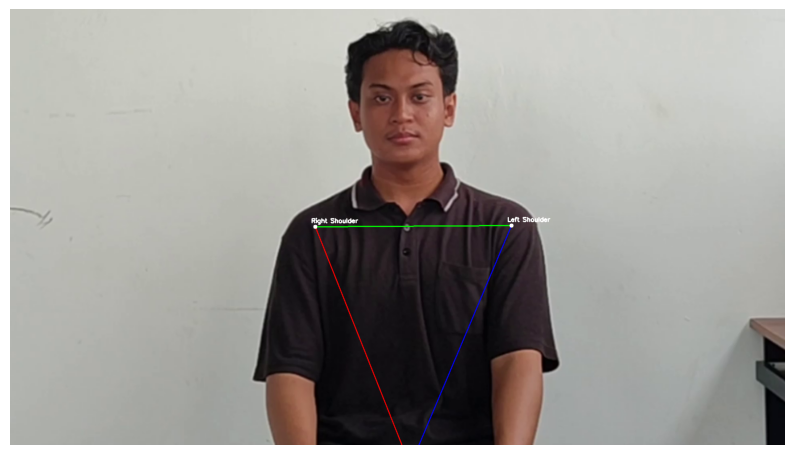

Saved output image to: d:\Aa\Kuliah\Semester 6\Sistem Teknologi Multimedia R\IF4021-HO3\media\tugas4_output.jpg


In [12]:
import cv2
import mediapipe as mp
import numpy as np

import matplotlib.pyplot as plt

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(static_image_mode=True)

# Open video and read first frame
cap = cv2.VideoCapture(video_path)
success, frame = cap.read()
cap.release()

if success:
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Process the image
    results = pose.process(image_rgb)
    
    if results.pose_landmarks:
        # Get coordinates for shoulders and hips
        # Move the shoulder landmarks up by adjusting the y-coordinate (subtracting 15 pixels)
        left_shoulder = (int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x * frame.shape[1]),
                        int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y * frame.shape[0]) - 15)
        
        right_shoulder = (int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * frame.shape[1]),
                         int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * frame.shape[0]) - 15)
        
        # Calculate mid-hip from left and right hip
        left_hip = (int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x * frame.shape[1]),
                   int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y * frame.shape[0]))
        
        right_hip = (int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x * frame.shape[1]),
                    int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y * frame.shape[0]))
        
        # Calculate the midpoint between left and right hip
        mid_hip = (int((left_hip[0] + right_hip[0]) / 2), 
                  int((left_hip[1] + right_hip[1]) / 2))
        
        # Draw lines
        cv2.line(frame, left_shoulder, right_shoulder, (0, 255, 0), 2)  # Green line between shoulders
        cv2.line(frame, left_shoulder, mid_hip, (255, 0, 0), 2)  # Blue line from left shoulder to hip
        cv2.line(frame, right_shoulder, mid_hip, (0, 0, 255), 2)  # Red line from right shoulder to hip
        
        # Add labels
        cv2.putText(frame, "Left Shoulder", (left_shoulder[0]-10, left_shoulder[1]-10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        cv2.putText(frame, "Right Shoulder", (right_shoulder[0]-10, right_shoulder[1]-10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        cv2.putText(frame, "Mid Hip", (mid_hip[0]-10, mid_hip[1]-10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        
        # Draw points
        cv2.circle(frame, left_shoulder, 5, (255, 255, 255), -1)
        cv2.circle(frame, right_shoulder, 5, (255, 255, 255), -1)
        cv2.circle(frame, mid_hip, 5, (255, 255, 255), -1)
        
        # Display result
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        # Save the frame
        output_path = os.path.join(os.getcwd(), 'media', 'tugas4_output.jpg')
        cv2.imwrite(output_path, frame)
        print(f"Saved output image to: {output_path}")

Hampir seluruh kode yang saya gunakan, dibuat oleh Copilot, bahkan bisa dibilang seluruhnya, saya hanya mengatur nilai posisi landmark dan semacamnya saja.

Pada tugas pose landmark, saya menggunakan mediapipe untuk mendeteksi bahu dan pinggul saya, kemudian membuat 3 titik penting yang saya fokuskan pada bahu kiri, bahu kanan, dan pinggul tengah. Titik-titik ini memiliki peran penting dalam pemahaman postur dan gerakan tubuh manusia. Bahu kiri dan kanan berfungsi sebagai penanda sumbu horizontal bagian atas tubuh. Ketika dihubungkan dengan garis, mereka membentuk garis referensi yang memungkinkan kita menganalisis kemiringan dan rotasi tubuh bagian atas. Misalnya, jika salah satu bahu lebih tinggi dari yang lain, ini bisa mengindikasikan tubuh sedang miring atau berotasi. Pinggul tengah, yang dihitung dari titik tengah antara pinggul kiri dan kanan, menjadi referensi pusat gravitasi tubuh bagian bawah. Titik ini sangat penting untuk menganalisis keseimbangan tubuh secara keseluruhan. Ketika dihubungkan dengan kedua bahu, kita dapat membentuk segitiga yang memberikan informasi tentang:

1. Postur tegak atau membungkuk - dilihat dari sudut antara garis vertikal dan garis yang menghubungkan bahu ke pinggul
2. Keseimbangan lateral - dilihat dari posisi relatif pinggul tengah terhadap titik tengah antara kedua bahu
3. Rotasi tubuh - dilihat dari perubahan bentuk segitiga saat tubuh berotasi

Dalam visualisasi yang saya buat, garis hijau menghubungkan kedua bahu untuk menunjukkan orientasi horizontal tubuh bagian atas, sementara garis biru dan merah menghubungkan masing-masing bahu ke pinggul tengah, membentuk kerangka dasar untuk analisis postur. Dengan mengamati perubahan pada ketiga titik dan garis ini secara real-time, sistem dapat mendeteksi berbagai gerakan dan postur tubuh, yang sangat berguna untuk aplikasi seperti analisis ergonomis, pemantauan aktivitas fisik, atau deteksi postur yang tidak sehat. (Analisis dihasilkan dari bahasa dan persepsi saya yang dimodifikasi bersama copilot).

# Pengumpulan
- Link pengumpulan ada di web perkuliahan
- Deadline akan diinformasikan di web perkuliahan
- Yang perlu dikumpulkan adalah hasil render .pdf (disarankan kalau berantakan, render via html, lalu buka html di browser dan save as pdf). Juga kumpulkan .ipynb
- Pastikan .ipynb sudah di run dan menampilkan hasil sebelum di save dan diunggah ke submission pengumpulan
- Format penamaan file `nim.pdf` dan `nim.ipynb`
- Berikan penjelasan yang sedetail-detailnya untuk setiap bagian eksperimen yang anda lakukan
- Silahkan berdiskusi dengan teman lain, meminta tutor, bertanya pada AI LLM. Namun jangan lupa memberikan atribusi kepada orang yang membantu, sumber yang digunakan, serta transkrip percakapan dengan AI LLM dan attach pada bagian paling bawah dari notebook.
---

---
## Catatan
- File video yang anda rekam beserta video output dari tugas nomor 2 dan 3 disimpan dalam google drive. Kemudian cantumkan link google drivenya pada notebook (.ipynb) anda.